In [ ]:
print("Hello World")

Hello World


/content/가덕도_0004 2000년 조위관측소수위분석폭풍해일고.csv

In [2]:
import pandas as pd

# 파일 경로 목록
file_path = '/content/가덕도 2204 2022년 조위관측소수위분석폭풍해일고.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터 프레임의 구조 및 일부 데이터 확인
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WTCH_YMDHMS  100 non-null    int64  
 1   WTCH_TDLV    100 non-null    float64
 2   PRDN_TDLV    100 non-null    float64
 3   SRG_HGH      100 non-null    float64
 4   SPOT_NM      100 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 4.0+ KB


(None,
       WTCH_YMDHMS  WTCH_TDLV  PRDN_TDLV  SRG_HGH SPOT_NM
 0  20220701000000      145.0      137.0      8.0     가덕도
 1  20220701010000      109.0      103.0      6.0     가덕도
 2  20220701020000       77.0       71.0      6.0     가덕도
 3  20220701030000       57.0       51.0      6.0     가덕도
 4  20220701040000       56.0       48.0      8.0     가덕도)

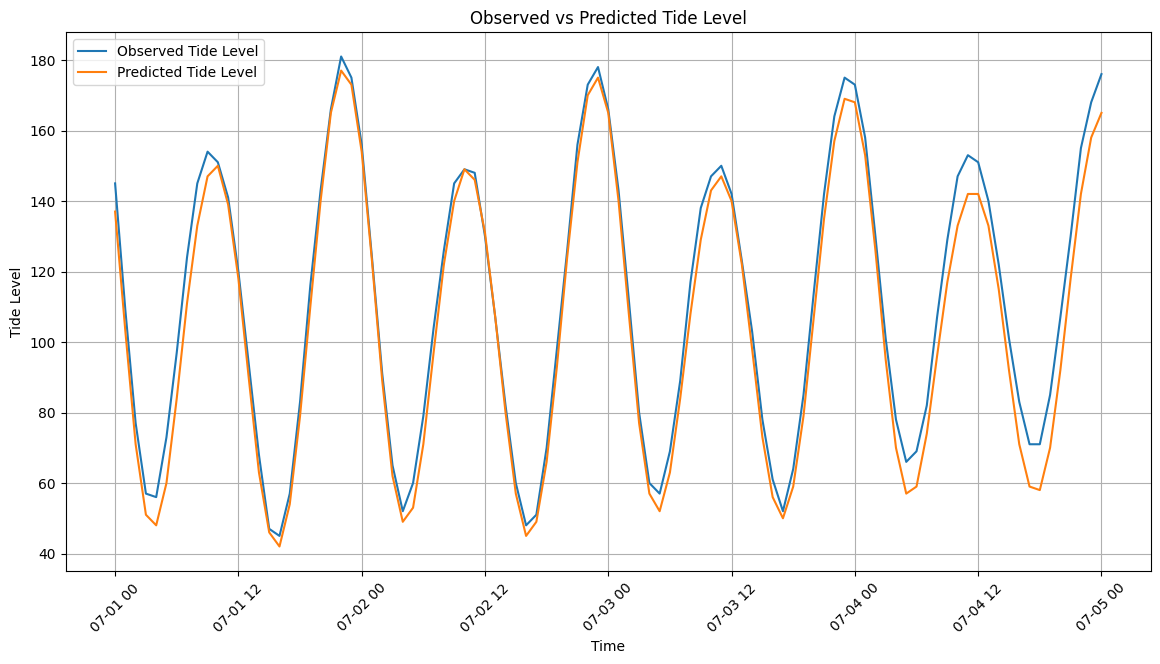

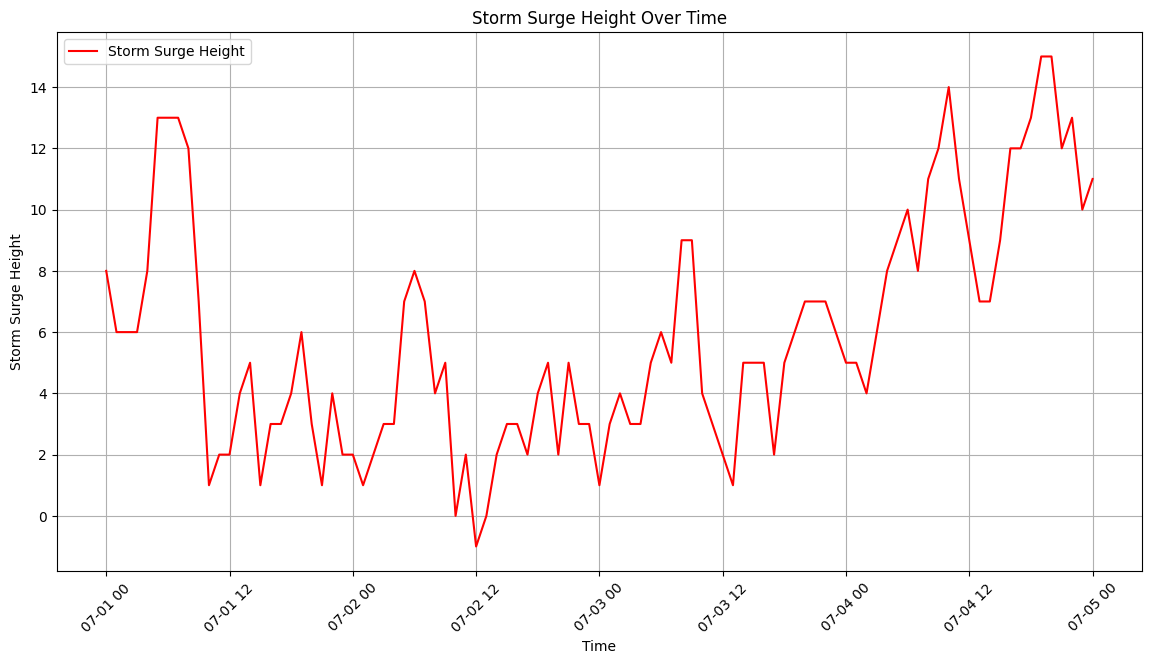

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 날짜 및 시간 컬럼을 datetime 형식으로 변환
df['WTCH_YMDHMS'] = pd.to_datetime(df['WTCH_YMDHMS'], format='%Y%m%d%H%M%S')

# 시각화를 위한 기본 설정
plt.figure(figsize=(14, 7))

# 관측 조위와 예측 조위를 시간에 따라 시각화
plt.plot(df['WTCH_YMDHMS'], df['WTCH_TDLV'], label='Observed Tide Level')
plt.plot(df['WTCH_YMDHMS'], df['PRDN_TDLV'], label='Predicted Tide Level')
plt.xlabel('Time')
plt.ylabel('Tide Level')
plt.title('Observed vs Predicted Tide Level')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 해일고를 시간에 따라 시각화
plt.figure(figsize=(14, 7))
plt.plot(df['WTCH_YMDHMS'], df['SRG_HGH'], label='Storm Surge Height', color='red')
plt.xlabel('Time')
plt.ylabel('Storm Surge Height')
plt.title('Storm Surge Height Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


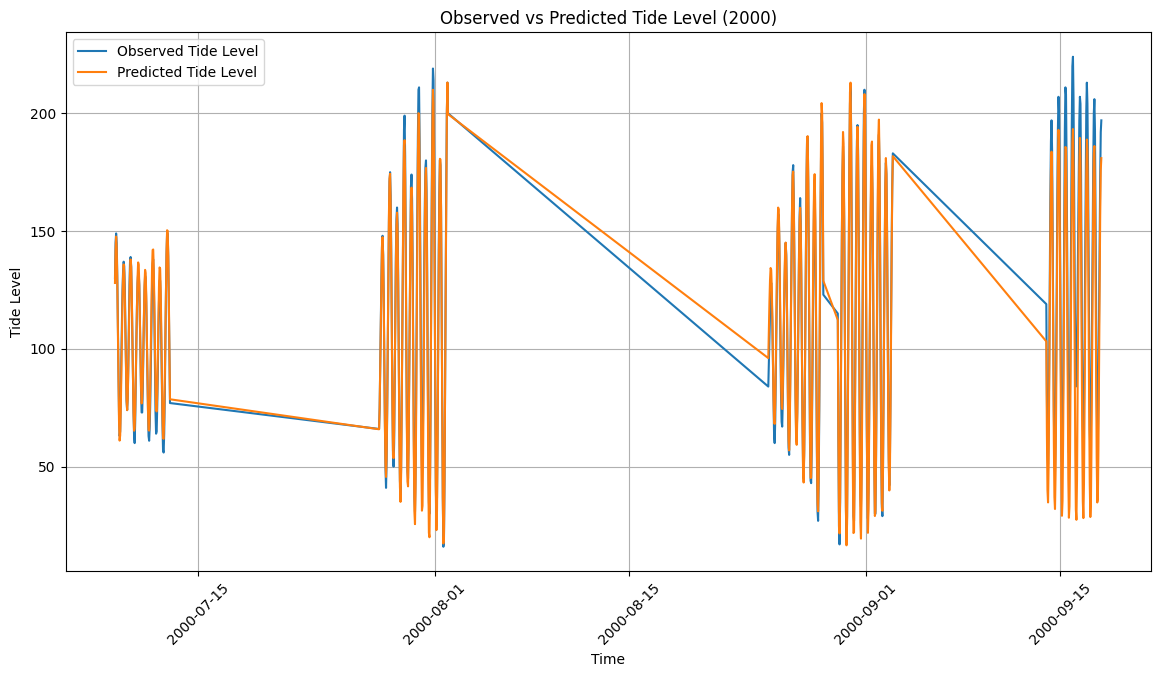

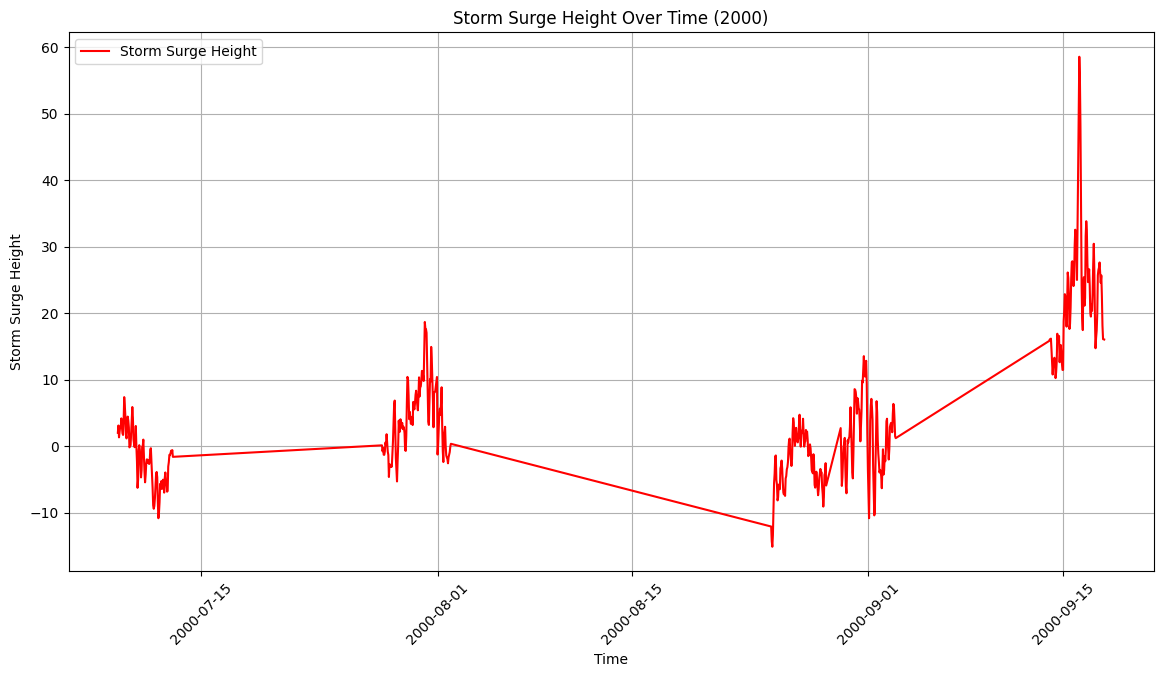

In [7]:
# 2000년 파일 경로 목록
file_paths_2000 = [
    '/content/가덕도_0004 2000년 조위관측소수위분석폭풍해일고.csv',
    '/content/가덕도_0006 2000년 조위관측소수위분석폭풍해일고.csv',
    '/content/가덕도_0010 2000년 조위관측소수위분석폭풍해일고.csv',
    '/content/가덕도_0012 2000년 조위관측소수위분석폭풍해일고.csv',
    '/content/가덕도_0014 2000년 조위관측소수위분석폭풍해일고.csv'
]

# 모든 파일의 데이터를 하나의 데이터프레임으로 통합
data_frames_2000 = []
for file_path in file_paths_2000:
    data_frames_2000.append(pd.read_csv(file_path))
df_combined_2000 = pd.concat(data_frames_2000, ignore_index=True)

# 날짜 및 시간 컬럼을 datetime 형식으로 변환
df_combined_2000['WTCH_YMDHMS'] = pd.to_datetime(df_combined_2000['WTCH_YMDHMS'], format='%Y%m%d%H%M%S')

# 시각화를 위한 기본 설정
plt.figure(figsize=(14, 7))

# 관측 조위와 예측 조위를 시간에 따라 시각화
plt.plot(df_combined_2000['WTCH_YMDHMS'], df_combined_2000['WTCH_TDLV'], label='Observed Tide Level')
plt.plot(df_combined_2000['WTCH_YMDHMS'], df_combined_2000['PRDN_TDLV'], label='Predicted Tide Level')
plt.xlabel('Time')
plt.ylabel('Tide Level')
plt.title('Observed vs Predicted Tide Level (2000)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 해일고를 시간에 따라 시각화
plt.figure(figsize=(14, 7))
plt.plot(df_combined_2000['WTCH_YMDHMS'], df_combined_2000['SRG_HGH'], label='Storm Surge Height', color='red')
plt.xlabel('Time')
plt.ylabel('Storm Surge Height')
plt.title('Storm Surge Height Over Time (2000)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [8]:
import pandas as pd
import glob
import os

def merge_csv_files(folder_path):
    # 폴더 내의 모든 CSV 파일 경로를 가져옵니다.
    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

    # 각 CSV 파일을 읽어들여 하나의 리스트로 만듭니다.
    dataframes = [pd.read_csv(csv_file) for csv_file in csv_files]

    # 모든 데이터프레임을 하나로 합칩니다.
    combined_dataframe = pd.concat(dataframes, ignore_index=True)

    return combined_dataframe

# 예제 사용
folder_path = '/content'  # CSV 파일들이 있는 폴더 경로로 변경해주세요.
combined_data = merge_csv_files(folder_path)

# 결과 출력
print(combined_data)


         WTCH_YMDHMS  WTCH_TDLV  PRDN_TDLV  SRG_HGH SPOT_NM
0     20190921000000      158.0     158.33    -0.33     가덕도
1     20190921010000      149.0     151.19    -2.19     가덕도
2     20190921020000      134.0     136.61    -2.61     가덕도
3     20190921030000      116.0     117.28    -1.28     가덕도
4     20190921040000       98.0      97.74     0.26     가덕도
...              ...        ...        ...      ...     ...
6706  20120804190000      128.0     129.31    -1.31     가덕도
6707  20120804200000      162.0     163.45    -1.45     가덕도
6708  20120804210000      189.0     190.03    -1.03     가덕도
6709  20120804220000      205.0     205.04    -0.04     가덕도
6710  20120804230000      204.0     202.72     1.28     가덕도

[6711 rows x 5 columns]


In [15]:
import pandas as pd
import glob
import os

def merge_csv_files(folder_path):
    # 폴더 내의 모든 CSV 파일 경로를 가져옵니다.
    csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

    # 각 CSV 파일을 읽어들여 하나의 리스트로 만듭니다.
    dataframes = [pd.read_csv(csv_file) for csv_file in csv_files]

    # 모든 데이터프레임을 하나로 합칩니다.
    combined_dataframe = pd.concat(dataframes, ignore_index=True)

    return combined_dataframe

def save_combined_csv(folder_path, output_file):
    # CSV 파일을 병합합니다.
    combined_data = merge_csv_files(folder_path)

    # 병합된 데이터를 CSV 파일로 저장합니다.
    combined_data.to_csv(output_file, index=False)

# 예제 사용
folder_path = '/content/test'  # CSV 파일들이 있는 폴더 경로로 변경해주세요.
output_file = '/content/test/combined_data.csv'  # 저장할 파일 경로로 변경해주세요.

save_combined_csv(folder_path, output_file)

print(f"Combined CSV file has been saved to {output_file}")


Combined CSV file has been saved to /content/test/combined_data.csv


In [10]:
# 파일 경로 목록
file_path = '/content/combined_data.csv'

# CSV 파일 읽기
df = pd.read_csv(file_path)

# 데이터 프레임의 구조 및 일부 데이터 확인
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   WTCH_YMDHMS  6711 non-null   int64  
 1   WTCH_TDLV    6532 non-null   float64
 2   PRDN_TDLV    6711 non-null   float64
 3   SRG_HGH      6532 non-null   float64
 4   SPOT_NM      6711 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 262.3+ KB


(None,
       WTCH_YMDHMS  WTCH_TDLV  PRDN_TDLV  SRG_HGH SPOT_NM
 0  20190921000000      158.0     158.33    -0.33     가덕도
 1  20190921010000      149.0     151.19    -2.19     가덕도
 2  20190921020000      134.0     136.61    -2.61     가덕도
 3  20190921030000      116.0     117.28    -1.28     가덕도
 4  20190921040000       98.0      97.74     0.26     가덕도)

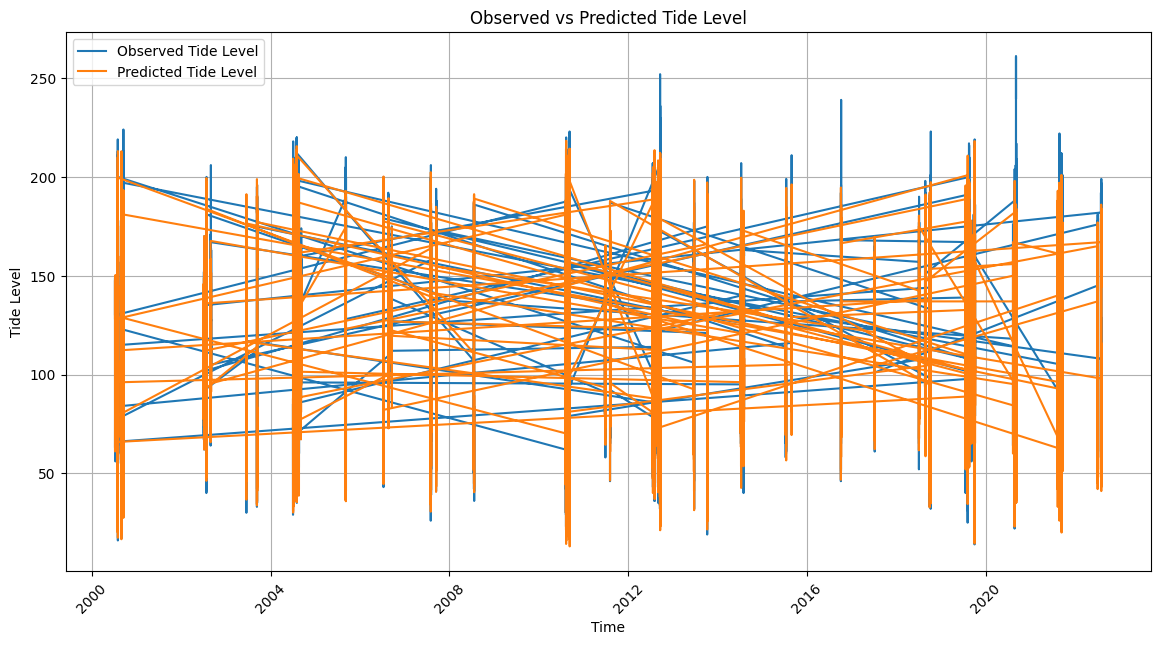

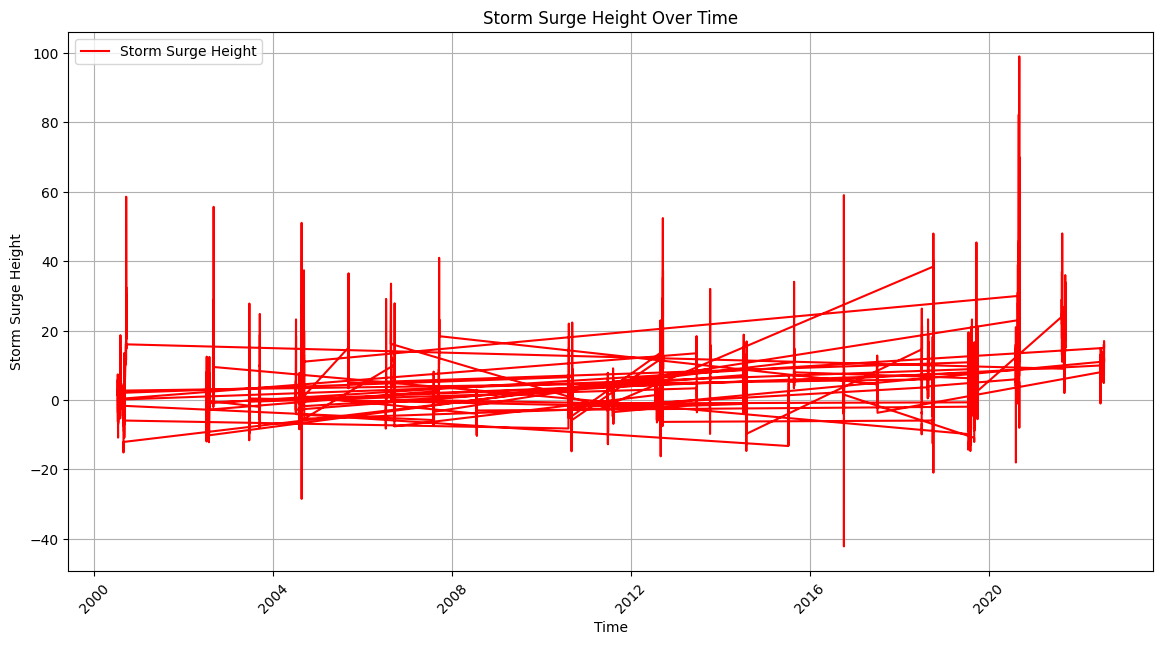

In [11]:
# 날짜 및 시간 컬럼을 datetime 형식으로 변환
df['WTCH_YMDHMS'] = pd.to_datetime(df['WTCH_YMDHMS'], format='%Y%m%d%H%M%S')

# 시각화를 위한 기본 설정
plt.figure(figsize=(14, 7))

# 관측 조위와 예측 조위를 시간에 따라 시각화
plt.plot(df['WTCH_YMDHMS'], df['WTCH_TDLV'], label='Observed Tide Level')
plt.plot(df['WTCH_YMDHMS'], df['PRDN_TDLV'], label='Predicted Tide Level')
plt.xlabel('Time')
plt.ylabel('Tide Level')
plt.title('Observed vs Predicted Tide Level')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 해일고를 시간에 따라 시각화
plt.figure(figsize=(14, 7))
plt.plot(df['WTCH_YMDHMS'], df['SRG_HGH'], label='Storm Surge Height', color='red')
plt.xlabel('Time')
plt.ylabel('Storm Surge Height')
plt.title('Storm Surge Height Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

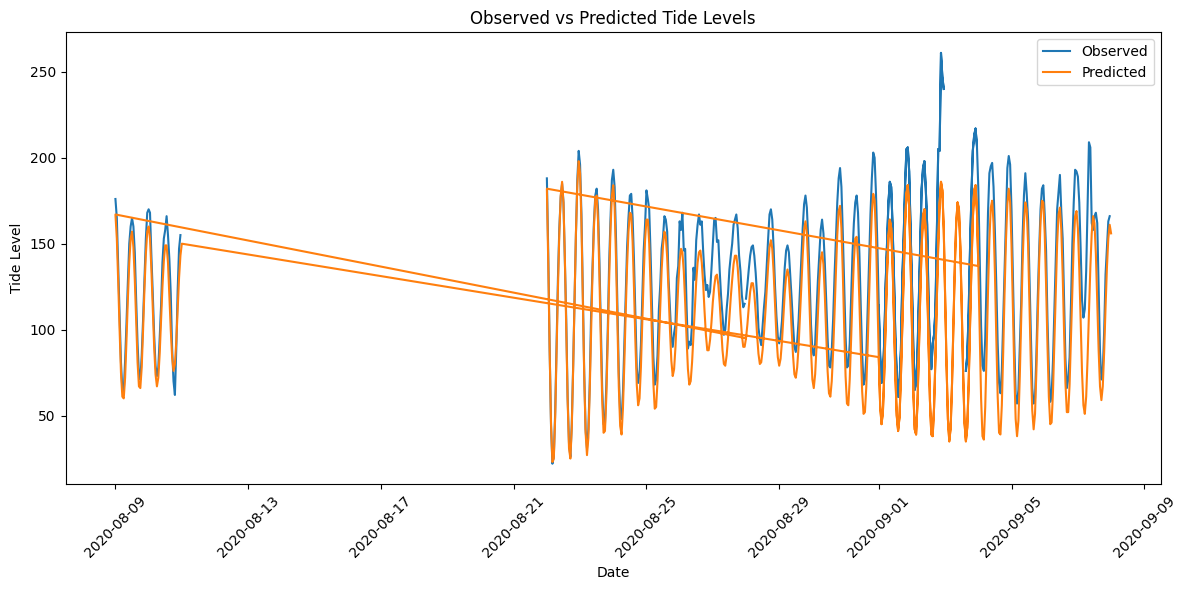

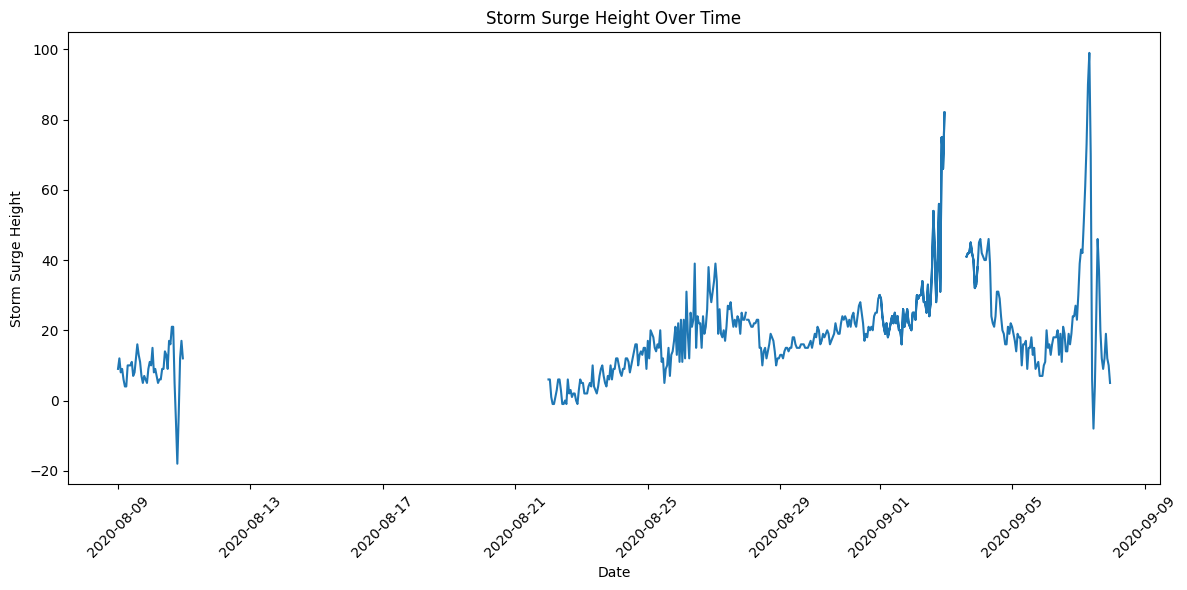

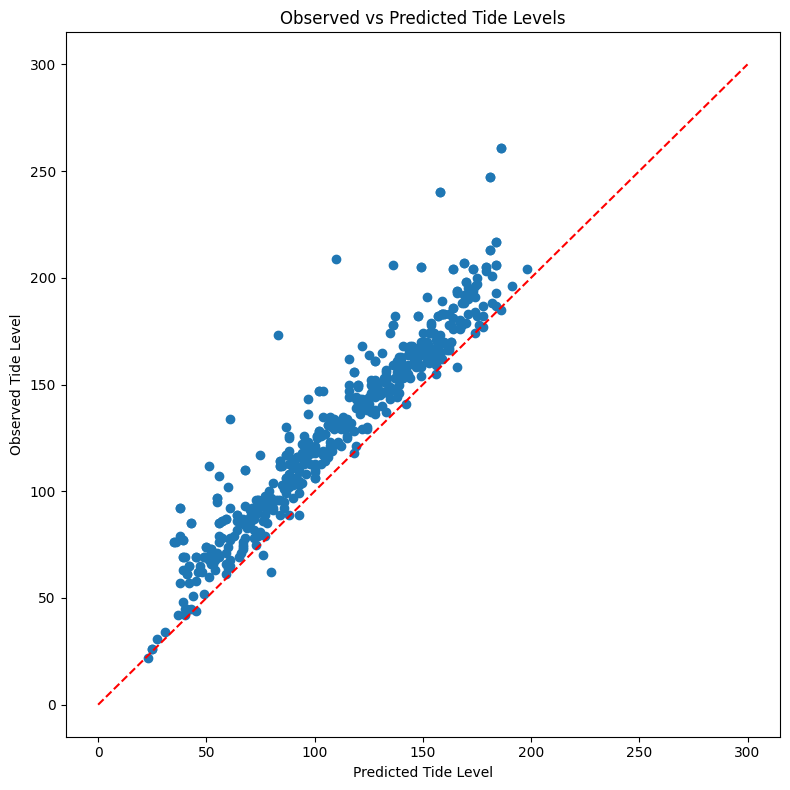

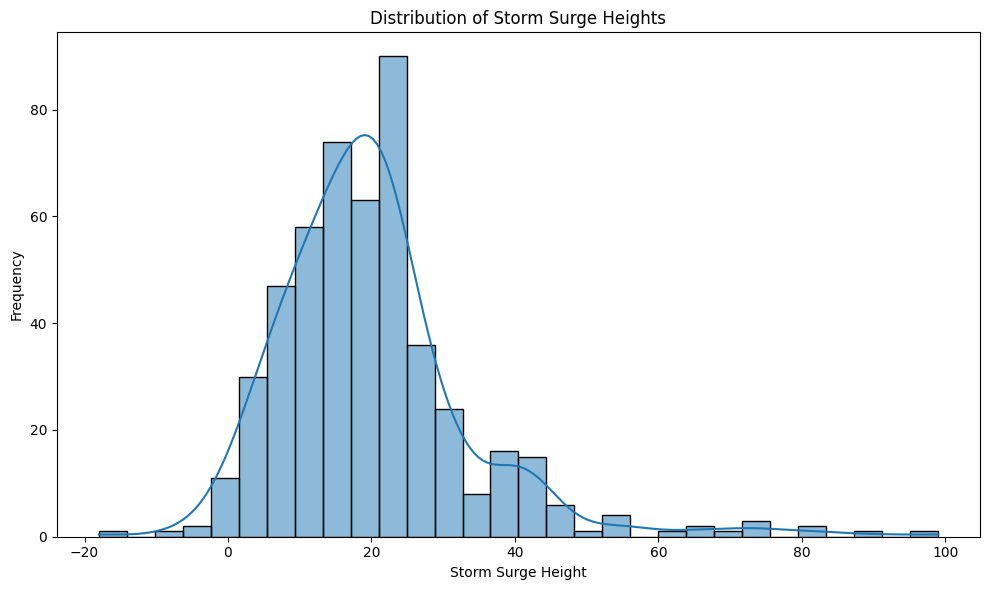

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
data = pd.read_csv('/content/test/combined_data.csv', parse_dates=['WTCH_YMDHMS'])

# 1. 시간에 따른 관측 조위와 예측 조위의 변화
plt.figure(figsize=(12, 6))
plt.plot(data['WTCH_YMDHMS'], data['WTCH_TDLV'], label='Observed')
plt.plot(data['WTCH_YMDHMS'], data['PRDN_TDLV'], label='Predicted')
plt.title('Observed vs Predicted Tide Levels')
plt.xlabel('Date')
plt.ylabel('Tide Level')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. 해일고의 시간에 따른 변화
plt.figure(figsize=(12, 6))
plt.plot(data['WTCH_YMDHMS'], data['SRG_HGH'])
plt.title('Storm Surge Height Over Time')
plt.xlabel('Date')
plt.ylabel('Storm Surge Height')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. 관측 조위와 예측 조위의 산점도
plt.figure(figsize=(8, 8))
plt.scatter(data['PRDN_TDLV'], data['WTCH_TDLV'])
plt.title('Observed vs Predicted Tide Levels')
plt.xlabel('Predicted Tide Level')
plt.ylabel('Observed Tide Level')
plt.plot([0, 300], [0, 300], 'r--')  # 완벽한 예측을 나타내는 대각선
plt.tight_layout()
plt.show()

# 4. 해일고의 히스토그램
plt.figure(figsize=(10, 6))
sns.histplot(data['SRG_HGH'], bins=30, kde=True)
plt.title('Distribution of Storm Surge Heights')
plt.xlabel('Storm Surge Height')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()